In [55]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('HW 3 Pandas/train.csv', nrows = 1000000) #считываем выборку основной таблицы

Проанализируем успеваемость студентов, через призму имеющихся характеристик образовательного процесса. 

1.Первичный анализ основного пакета данных

In [57]:
df.head (15)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


In [58]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [59]:
df.describe ()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693
std,288675.278933,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


2.Первичный анализ вспомогательных таблиц

In [60]:
df_q = pd.read_csv('HW 3 Pandas/questions.csv') #считываем таблицу

In [61]:
df_q.head ()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [62]:
df_q.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [63]:
df_q.describe ()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [64]:
df_l = pd.read_csv('HW 3 Pandas/lectures.csv') #считываем таблицу

In [65]:
df_l.head ()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [66]:
df_l.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [67]:
df_l.describe ()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


Исходя из первичного анализа данных делаем вывод, что предоставленный набор данных не требует дополнительной предварительной обработки данных. 

Переходим к анализу успеваемость студентов


Рассмотрим взаимосвязь количества взаимодействий с образовательной системой 
относительно продолжительности её использования учениками

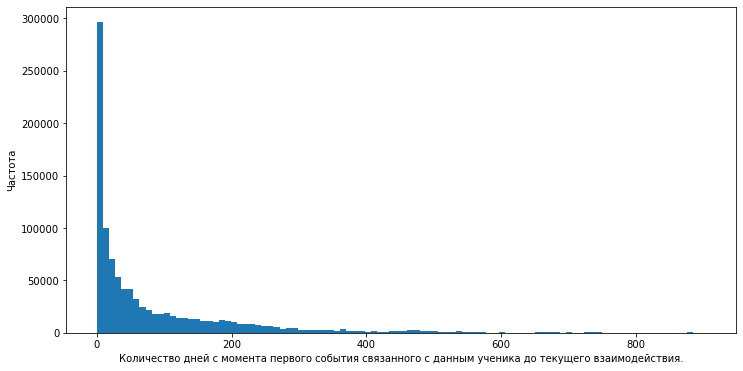

In [68]:
#1 day = 86400000 ms
ts = df['timestamp']/86400000
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)

plt.xticks(rotation=0)
plt.xlabel("Количество дней с момента первого события связанного с данным ученика до текущего взаимодействия.")
plt.ylabel("Частота")
plt.show()

Можем сделать вывод, что значительное количество учеников использует образовательную платформу в краткосрочном периоде

Проверим долю правильных ответов на вопросы

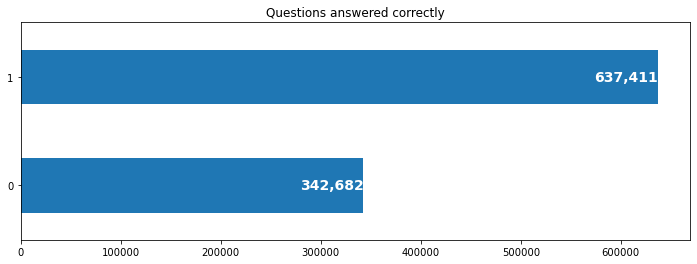

In [69]:
correct = df[df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Questions answered correctly")
plt.xticks(rotation=0)
plt.show()

In [70]:
user_percent = df[df.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'На максимальное количество вопросов ответил Пользователь № {user_percent.Answers.max()}')

На максимальное количество вопросов ответил Пользователь № 10797


Установим взаимосвязь количества данных ответов на платформе с долей правильных ответов

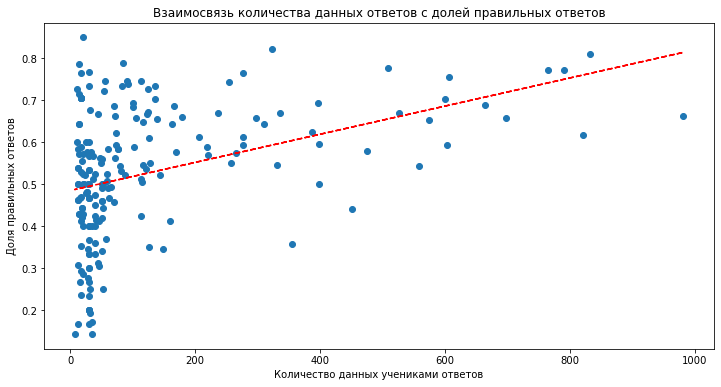

In [71]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Взаимосвязь количества данных ответов с долей правильных ответов")
plt.xticks(rotation=0)
plt.xlabel("Количество данных учениками ответов")
plt.ylabel("Доля правильных ответов")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Можем сделать вывод, что прохождение тестов на платформе способствует увелечению количества положительных ответов